# Elbow Method & Silhouette Score for K selection 

- Customer Segmentation Dataset

### Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and preprocess the data

In [2]:
data = pd.read_csv('customer_segmentation.csv')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
data.shape

(10695, 11)

In [4]:
# Drop non-numeric and irrelevant columns (e.g., ID, Gender, etc.)
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])


In [5]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [6]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [7]:
# Drop rows with missing values (NaN)
data = data.dropna()

### Step 3: Scale the data (if needed)

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Step 4: Apply K-Means for Various K Values


In [9]:
inertia_values = [] # Also Known as WCSS 
silhouette_scores = []
K_range = range(2, 11)  # You can adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, init= 'k-means++', random_state=42)
    kmeans.fit(data_scaled)
    
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

In [10]:
inertia_values

[20124.07109280248,
 13014.664681611672,
 9801.31270715444,
 8531.05058881542,
 7323.934017203172,
 6309.327486234021,
 5837.207684092016,
 5495.217968385097,
 5230.415340103163]

In [11]:
print(silhouette_scores)

[np.float64(0.2694972009523588), np.float64(0.3543380730251246), np.float64(0.35186036094189155), np.float64(0.3564238777132847), np.float64(0.36285216732331926), np.float64(0.35808478192614307), np.float64(0.3515340641430051), np.float64(0.34044504989108004), np.float64(0.34820568097637344)]


### Step 5: Elbow Method

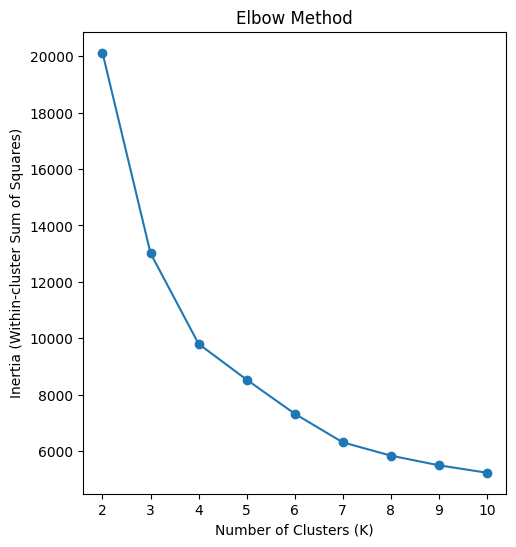

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

### Step 6: Silhouette Score

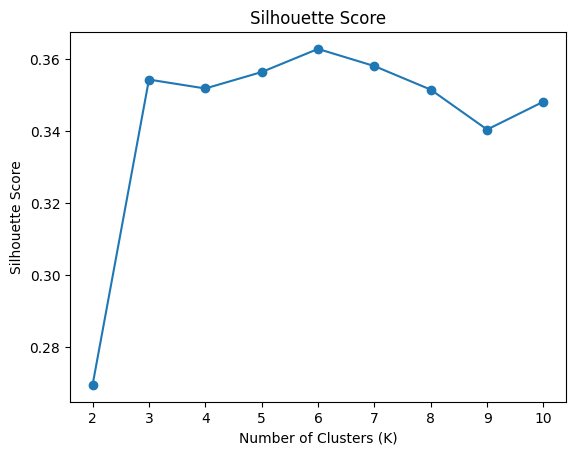

In [13]:
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

### Step 8: Interpretation

In [14]:
# Find the K value from the Elbow Method
elbow_K = 3  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 6  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 6


In [15]:
'''You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and
the characteristics of the dataset'''

'You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and\nthe characteristics of the dataset'